In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats
import requests
import gmaps
import os

In [2]:
wine_consumption_df = pd.read_csv("Resources/wine-consumption-per-person.csv")
wine_consumption_df=wine_consumption_df.rename(columns={"Indicator:Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) - Beverage Types:Wine":"Wine Consumption per capita (Liters)"})

In [3]:
#Cleaning up column names
merged_df = pd.read_csv("Resources/mega_df.csv")
merged_df = merged_df.rename(columns={'continent':'Continent', 'country_code':'Country Code', 'country':'Country', 'consumption_per_capita_(L)':'Alcohol Consumption Per Capita (Liters)', 'climate':'Climate', 'main_export':'Main Export', 'main_industry':'Main Industry', 'region':'Region', 'happy_score':'Happiness Score', 'life_expectancy':'Life Expectancy', 'gdp_per_capita':'GDP per capita', 'mental_health_and_addiction (%)':'Mental Health Disorders (%)'})
len(merged_df)

186

In [4]:
#Dropping columns that we will not need
updated_df=merged_df.drop(['index','Unnamed: 0', 'code', 'Main Export', 'Main Industry'], axis=1)
updated_df.head()

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%)
0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,South Asia,2.5669,52.590000,7.462861,17.553463
1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610
2,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Middle East and North Africa,5.0051,65.905174,9.537965,14.700388
3,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",NaN,NaN,NaN,NaN,14.726869
4,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,NaN,NaN,NaN,NaN,12.498281


# Alcohol Consumption by Continent

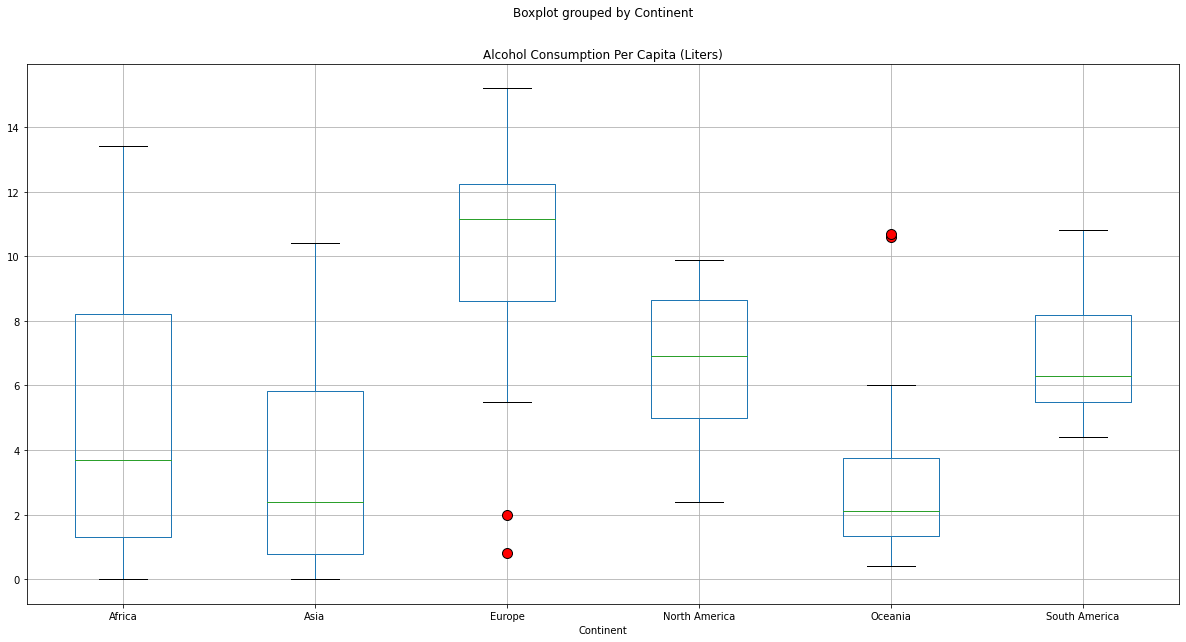

In [5]:
updated_df.boxplot("Alcohol Consumption Per Capita (Liters)", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

In [6]:
group1 = updated_df[updated_df["Continent"] == "Africa"]["Alcohol Consumption Per Capita (Liters)"]
group2 = updated_df[updated_df["Continent"] == "Asia"]["Alcohol Consumption Per Capita (Liters)"]
group3 = updated_df[updated_df["Continent"] == "Europe"]["Alcohol Consumption Per Capita (Liters)"]
group4 = updated_df[updated_df["Continent"] == "North America"]["Alcohol Consumption Per Capita (Liters)"]
group5 = updated_df[updated_df["Continent"] == "Oceania"]["Alcohol Consumption Per Capita (Liters)"]
group6 = updated_df[updated_df["Continent"] == "South America"]["Alcohol Consumption Per Capita (Liters)"]

In [7]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=39.0908735441233, pvalue=5.946781924844183e-19)

In [8]:
stats.ttest_ind(group3, group5)

Ttest_indResult(statistic=6.739906169357296, pvalue=9.301922597184508e-09)

Africa's potential outliers: Series([], Name: Alcohol Consumption Per Capita (Liters), dtype: float64)
Asia's potential outliers: Series([], Name: Alcohol Consumption Per Capita (Liters), dtype: float64)
Europe's potential outliers: 6      0.8
169    2.0
Name: Alcohol Consumption Per Capita (Liters), dtype: float64
North America's potential outliers: Series([], Name: Alcohol Consumption Per Capita (Liters), dtype: float64)
Oceania's potential outliers: 8      10.6
120    10.7
Name: Alcohol Consumption Per Capita (Liters), dtype: float64
South America's potential outliers: Series([], Name: Alcohol Consumption Per Capita (Liters), dtype: float64)


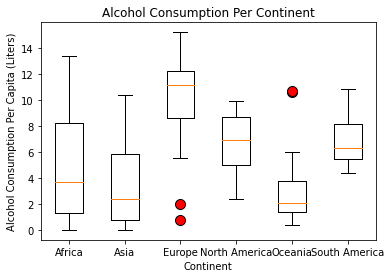

In [9]:
continents = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"]

# Create empty list to fill with tumor vol data (for plotting)
alcohol_consumption_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for continent in continents:
      
    # Locate the rows which contain mice on each drug and get the tumor volumes
    alcohol_by_continent=updated_df.loc[updated_df["Continent"]==continent, "Alcohol Consumption Per Capita (Liters)"]
    
    # add subset 
    alcohol_consumption_data.append(alcohol_by_continent)

    quartiles = alcohol_by_continent.quantile([.25,.5,.75])
    lower_q=quartiles[0.25]
    upper_q=quartiles[0.75]
    iqr=upper_q-lower_q
    lower_bound=lower_q - (1.5*iqr)
    upper_bound=upper_q + (1.5*iqr)
    outliers=alcohol_by_continent.loc[(alcohol_by_continent<lower_bound)|(alcohol_by_continent>upper_bound)]
    print(f"{continent}'s potential outliers: {outliers}")
    
rate=dict(markerfacecolor='red', markersize=10)
plt.boxplot(alcohol_consumption_data, labels=continents, flierprops=rate)
plt.ylabel('Alcohol Consumption Per Capita (Liters)')
plt.xlabel('Continent')
plt.title('Alcohol Consumption Per Continent')
plt.show()

In [10]:
#Number of values per continent
updated_df_countries_by_continent=updated_df["Continent"].value_counts()
updated_df_countries_by_continent

Africa           53
Europe           46
Asia             40
North America    23
South America    12
Oceania          12
Name: Continent, dtype: int64

In [11]:
#Total liters drunk by continent
alcohol_by_continent_sum=updated_df.groupby("Continent")[["Alcohol Consumption Per Capita (Liters)"]].sum()
alcohol_by_continent_sum

,Alcohol Consumption Per Capita (Liters)
Continent,
Africa,252.7
Asia,137.6
Europe,473.4
North America,157.3
Oceania,42.5
South America,83.2


<ipython-input-12-9fbe577f7e6d>:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(alcohol_by_continent_sum, labels=continents, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x7ff13b6a9220>,
 [Text(0.8467456254153936, 0.7021551437110564, 'Africa'),
  Text(-0.2086293354511101, 1.0800341663064315, 'Asia'),
  Text(-1.0528118350214484, -0.31872753260233183, 'Europe'),
  Text(0.47954029770548146, -0.9899702535311545, 'North America'),
  Text(0.9247119831680095, -0.5957413433575742, 'Oceania'),
  Text(1.0715470782973886, -0.24856962604536018, 'South America')],
 [Text(0.46186125022657826, 0.38299371475148525, '22.0%'),
  Text(-0.11379781933696911, 0.5891095452580534, '12.0%'),
  Text(-0.57426100092079, -0.1738513814194537, '41.3%'),
  Text(0.26156743511208075, -0.5399837746533569, '13.7%'),
  Text(0.5043883544552779, -0.3249498236495859, '3.7%'),
  Text(0.5844802245258482, -0.13558343238837825, '7.3%')])

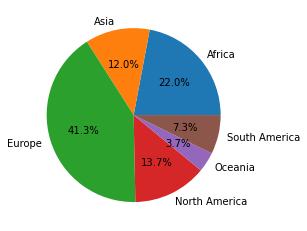

In [12]:
#Pie chart displaying total liters of alcohol drunk by continent
plt.pie(alcohol_by_continent_sum, labels=continents, autopct='%1.1f%%')

<ipython-input-13-1227b1850bfa>:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(alcohol_by_continent_mean, labels=continents, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x7ff13b701610>,
 [Text(1.0051820037963315, 0.44677638617544707, 'Africa'),
  Text(0.46109470062371827, 0.9986949869988954, 'Asia'),
  Text(-0.7673176573487064, 0.7881773992705535, 'Europe'),
  Text(-0.838559517633741, -0.711911465974434, 'North America'),
  Text(0.04807197041236565, -1.098949082378557, 'Oceania'),
  Text(0.9027453275847895, -0.6285307259982054, 'South America')],
 [Text(0.5482810929798171, 0.24369621064115293, '13.3%'),
  Text(0.25150620034020993, 0.5447427201812156, '9.6%'),
  Text(-0.4185369040083852, 0.4299149450566655, '28.7%'),
  Text(-0.4573961005274951, -0.38831534507696397, '19.1%'),
  Text(0.02622107477038126, -0.5994267722064857, '9.9%'),
  Text(0.49240654231897607, -0.3428349414535665, '19.4%')])

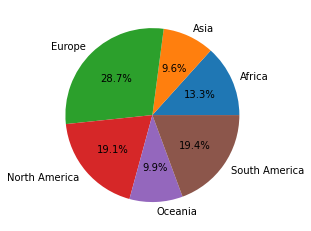

In [13]:
#Pie chart displaying average liters of alcohol drunk by continent
alcohol_by_continent_mean=updated_df.groupby("Continent")[["Alcohol Consumption Per Capita (Liters)"]].mean()
plt.pie(alcohol_by_continent_mean, labels=continents, autopct='%1.1f%%')

In [14]:
#Statistical analysis of alcohol consumption by continent
agg_alcohol_df=updated_df.groupby("Continent")["Alcohol Consumption Per Capita (Liters)"].agg(['mean','median', 'var', 'std', 'sem'])
agg_alcohol_df

,mean,median,var,std,sem
Continent,,,,,
Africa,4.767925,3.70,14.059913,3.749655,0.515055
Asia,3.440000,2.40,9.578872,3.094975,0.489359
Europe,10.291304,11.15,8.688367,2.947604,0.434600
North America,6.839130,6.90,4.957036,2.226440,0.464245
Oceania,3.541667,2.10,13.048106,3.612216,1.042757
South America,6.933333,6.30,4.344242,2.084285,0.601681


## Adding Wine Data

In [16]:
#Getting the latest timepoint for wine consumption data and merging it with the wine dataframe
wine_latest_timepoint_per_country=wine_consumption_df.groupby("Entity")[["Year"]].max()
merged_updated_timepoint_wine_df = wine_latest_timepoint_per_country.merge(wine_consumption_df, on = ["Entity", "Year"], how="left")
merged_updated_timepoint_wine_df.head()

,Entity,Year,Code,Wine Consumption per capita (Liters)
0,Afghanistan,2013,AFG,0.00
1,Albania,2014,ALB,1.14
2,Algeria,2013,DZA,0.22
3,Andorra,2013,AND,4.29
4,Angola,2014,AGO,1.32


In [17]:
#Getting the average for wine consumption data from 1960 to 2014
wine_average_consumption_per_country=wine_consumption_df.groupby("Entity")[["Wine Consumption per capita (Liters)"]].mean()
wine_average_consumption_per_country.sample(5)

,Wine Consumption per capita (Liters)
Entity,
Cook Islands,0.986818
Mauritania,0.021373
Chad,0.072264
Zimbabwe,0.045556
Morocco,0.320370


In [18]:
#Merging the average for wine consumption data from 1960 to 2014 into the wine dataframe
merged_updated_timepoint_average_wine_df = merged_updated_timepoint_wine_df.merge(wine_average_consumption_per_country, on = ["Entity"], how="left")
merged_updated_timepoint_average_wine_df=merged_updated_timepoint_average_wine_df.rename(columns={"Wine Consumption per capita (Liters)_x":"Wine Consumption at Latest Timepoint(L)", "Wine Consumption per capita (Liters)_y":"Wine Consumption Average Over The Years(L)", "Year":"Latest Year for Wine Consumption Data"})
merged_updated_timepoint_average_wine_df.sample(5)

,Entity,Latest Year for Wine Consumption Data,Code,Wine Consumption at Latest Timepoint(L),Wine Consumption Average Over The Years(L)
120,New Zealand,2015,NZL,2.92,2.040182
64,Georgia,2014,GEO,2.50,3.045200
157,South Korea,2013,KOR,0.15,0.033585
167,Thailand,2014,THA,0.04,0.011296
170,Tonga,2011,TON,0.10,0.137273


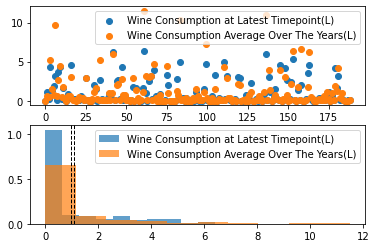

In [20]:
# Scatter Plot to show the potential diffirence or similarity between average wine consumption from 1960 to 2014
# and wine consumption at the latest available timepoint
last_timepoint_wine=merged_updated_timepoint_average_wine_df["Wine Consumption at Latest Timepoint(L)"]
average_wine=merged_updated_timepoint_average_wine_df["Wine Consumption Average Over The Years(L)"]
    
plt.subplot(2,1,1)
plt.scatter(range(len(last_timepoint_wine)), last_timepoint_wine, label="Wine Consumption at Latest Timepoint(L)")
plt.scatter(range(len(average_wine)), average_wine, label="Wine Consumption Average Over The Years(L)")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(last_timepoint_wine, 10, density=True, alpha=0.7, label="Wine Consumption at Latest Timepoint(L)")
plt.hist(average_wine, 10, density=True, alpha=0.7, label="Wine Consumption Average Over The Years(L)")
plt.axvline(last_timepoint_wine.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(average_wine.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

In [21]:
#Checking how different is data (average over teh years vs at the last timepoint)
stats.ttest_ind(last_timepoint_wine, average_wine, equal_var=False)

Ttest_indResult(statistic=-0.6190622697626872, pvalue=0.5362811196901257)

In [22]:
#Seeing that it is not significantly different, we decided to only use the wine consumption data at the last timepoint
merged_with_wine_df = updated_df.merge(merged_updated_timepoint_average_wine_df, left_on="Country", right_on="Entity", how="inner")
merged_with_wine_df = merged_with_wine_df.drop(['Code', 'Entity', 'Latest Year for Wine Consumption Data', 'Wine Consumption Average Over The Years(L)'], axis=1)
len(merged_with_wine_df)

186

In [25]:
#Renaming the column containing wine data
merged_with_wine_df=merged_with_wine_df.rename(columns={"Wine Consumption at Latest Timepoint(L)":"Wine Consumption per capita (Liters)"})
merged_with_wine_df.head()

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters)
0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,South Asia,2.5669,52.590000,7.462861,17.553463,0.00
1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610,1.14
2,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Middle East and North Africa,5.0051,65.905174,9.537965,14.700388,0.22
3,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",NaN,NaN,NaN,NaN,14.726869,4.29
4,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,NaN,NaN,NaN,NaN,12.498281,1.32


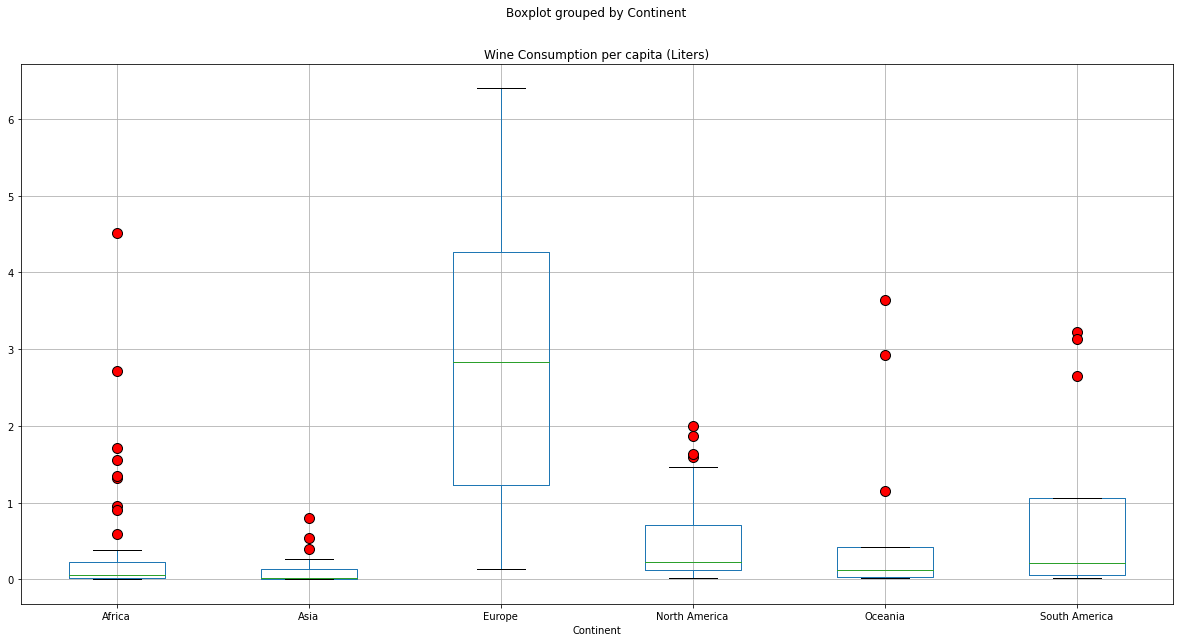

In [26]:
#Boxlot to display wineconsumption per continent
merged_with_wine_df.boxplot("Wine Consumption per capita (Liters)", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

In [57]:
#Total liters of wine drunk by continent
wine_by_continent_sum=merged_with_wine_df.groupby("Continent")[["Wine Consumption per capita (Liters)"]].sum()
wine_by_continent_sum

,Wine Consumption per capita (Liters)
Continent,
Africa,19.33
Asia,3.77
Europe,128.76
North America,12.95
Oceania,8.47
South America,10.62


<ipython-input-58-c587791df067>:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(wine_by_continent_sum, labels=continents, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x7ff13b922ee0>,
 [Text(1.0405690428721233, 0.3566736141294919, 'Africa'),
  Text(0.8234672245199254, 0.7293159330094544, 'Asia'),
  Text(-1.0871964742690565, 0.1673434382846632, 'Europe'),
  Text(0.7063943836309732, -0.8432122951989123, 'North America'),
  Text(0.9613367470084627, -0.5346322650674828, 'Oceania'),
  Text(1.0819467125776006, -0.1984724442901918, 'South America')],
 [Text(0.5675831142938853, 0.19454924407063193, '10.5%'),
  Text(0.44916394064723203, 0.39780869073242964, '2.1%'),
  Text(-0.5930162586922125, 0.09127823906436174, '70.0%'),
  Text(0.38530602743507625, -0.45993397919940665, '7.0%'),
  Text(0.5243654983682523, -0.29161759912771784, '4.6%'),
  Text(0.5901527523150547, -0.10825769688555915, '5.8%')])

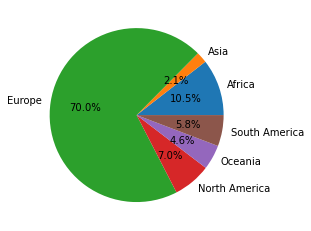

In [58]:
#Pie chart showing % of total liters of wine drunk by continent
plt.pie(wine_by_continent_sum, labels=continents, autopct='%1.1f%%')

<ipython-input-59-f1a2b9606579>:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(wine_by_continent_mean, labels=continents, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x7ff13b5b99d0>,
 [Text(1.0754393318094824, 0.23114982932542724, 'Africa'),
  Text(0.9766376964107641, 0.5061410968786041, 'Asia'),
  Text(-0.6091785234187155, 0.9159156765802153, 'Europe'),
  Text(-0.6237980449763113, -0.9060220742806061, 'North America'),
  Text(0.14652527511625277, -1.0901973875184745, 'Oceania'),
  Text(0.9580077791020227, -0.5405747822272237, 'South America')],
 [Text(0.5866032718960813, 0.12608172508659668, '6.7%'),
  Text(0.5327114707695076, 0.276076961933784, '1.7%'),
  Text(-0.3322791945920266, 0.49959036904375376, '51.7%'),
  Text(-0.3402534790779879, -0.49419385869851234, '10.4%'),
  Text(0.07992287733613786, -0.5946531204646224, '13.0%'),
  Text(0.5225496976920123, -0.29485897212394013, '16.4%')])

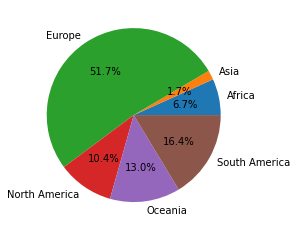

In [59]:
#Average liters of wine drunk by continent and a pie chart
wine_by_continent_mean=merged_with_wine_df.groupby("Continent")[["Wine Consumption per capita (Liters)"]].mean()
plt.pie(wine_by_continent_mean, labels=continents, autopct='%1.1f%%')

In [60]:
#Percentage of wine out of total alcohol drank per continent
grouped_continent_wine_percentage=wine_by_continent_sum.values/alcohol_by_continent_sum.values*100
grouped_continent_wine_percentage

array([[ 7.64938662],
       [ 2.73982558],
       [27.19898606],
       [ 8.23267641],
       [19.92941176],
       [12.76442308]])

In [61]:
#Output CSV for merged data
merged_with_wine_df.to_csv("merged_with_wine_df.csv")

## Cleaning Data for Further Correlations Between Alcohol Consumption and GDP, Life Expectancy, Happiness Score and Mental Health

In [62]:
#Dropping NaN values from the dataframe to calculate further correlations
gdp_and_life_expectancy_df=merged_with_wine_df.dropna(subset=['GDP per capita', 'Life Expectancy'])
len(gdp_and_life_expectancy_df)

141

In [63]:
#Dispalying number of datapoints per each continent in this dataframe
gdp_and_life_expectancy_df_countries_by_continent=gdp_and_life_expectancy_df["Continent"].value_counts()
gdp_and_life_expectancy_df_countries_by_continent

Europe           43
Africa           39
Asia             34
North America    13
South America    10
Oceania           2
Name: Continent, dtype: int64

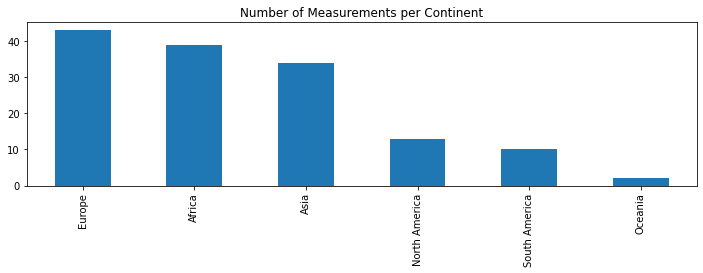

In [64]:
#Visual for the number of datapoints in each continent
gdp_and_life_expectancy_df_countries_by_continent.plot(kind='bar', figsize=(12,3), title ='Number of Measurements per Continent')

In [65]:
#Statistical analysis of data in the final dataframe
gdp_and_life_expectancy_df.describe()

,Alcohol Consumption Per Capita (Liters),Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters)
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,6.480142,5.497109,64.637501,9.309033,13.068401,1.085816
std,4.112111,1.112771,6.814233,1.192886,1.892776,1.633237
min,0.000000,2.566900,45.200001,6.492642,10.067097,0.000000
25%,2.800000,4.729300,59.599152,8.350645,11.630930,0.020000
50%,6.600000,5.541500,66.404343,9.500369,12.526669,0.170000
75%,9.800000,6.228500,69.002548,10.263742,14.536026,1.670000
max,15.200000,7.808700,76.804581,11.450681,18.495605,6.400000


## Looking at correlations between Alcohol Consumption and GDP, Life Expectancy, Happiness Score and Mental Health per Continent

In [66]:
#Define function to build linear regressions
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, edgecolors='k')
    plt.plot(x_values,regress_values, "r-")
    plt.xlabel('Alcohol Consumption Per Capita (Liters)')
    plt.ylabel(title)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [67]:
#Average Happiness Score by Continent
happiness_score_mean=gdp_and_life_expectancy_df.groupby("Continent")[["Happiness Score"]].mean()
happiness_score_mean

,Happiness Score
Continent,
Africa,4.441672
Asia,5.282953
Europe,6.231049
North America,6.184008
Oceania,7.261200
South America,5.939710


The r-value is: 0.18116385485317182


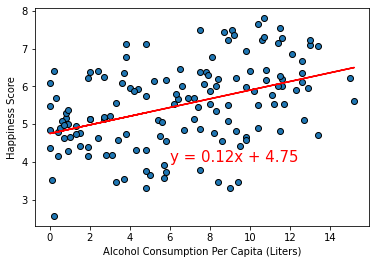

In [68]:
#Plot linear regression between the Happiness Score and Alcohol Consumption
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['Happiness Score']
plot_linear_regression(x_values,y_values,'Happiness Score',(6,4))

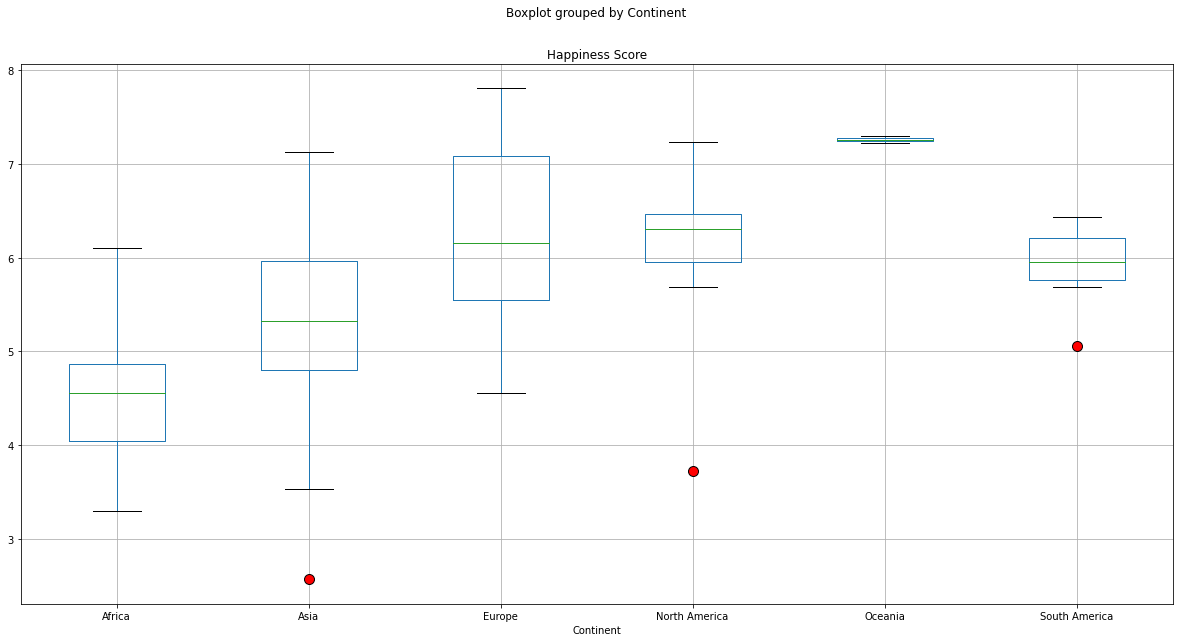

In [69]:
#Boxplot of Happiness Score by Continent
gdp_and_life_expectancy_df.boxplot("Happiness Score", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

In [70]:
#Average Life Expectancy by Continent
life_expectancy_by_continent_mean=gdp_and_life_expectancy_df.groupby("Continent")[["Life Expectancy"]].mean()
life_expectancy_by_continent_mean

,Life Expectancy
Continent,
Africa,56.636795
Asia,65.107686
Europe,69.805096
North America,66.825558
Oceania,73.403584
South America,67.423274


The r-value is: 0.15718368589991474


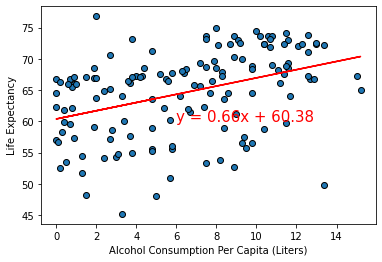

In [71]:
#Plot linear regression between the Life Expectancy and Alcohol Consumption
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['Life Expectancy']
plot_linear_regression(x_values,y_values,'Life Expectancy',(6,60))

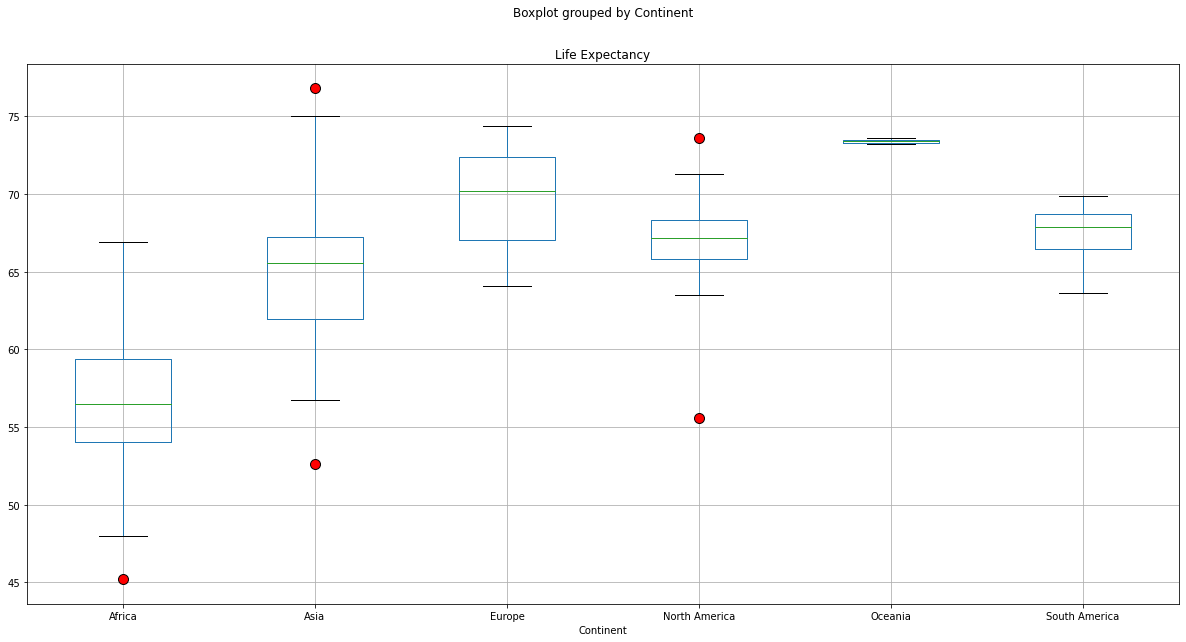

In [72]:
#Boxplot of Life Expectancy by Continent
gdp_and_life_expectancy_df.boxplot("Life Expectancy", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

In [73]:
#Average GDP by Continent
gdp_by_continent_mean=gdp_and_life_expectancy_df.groupby("Continent")[["GDP per capita"]].mean()
gdp_by_continent_mean

,GDP per capita
Continent,
Africa,8.079819
Asia,9.376013
Europe,10.243561
North America,9.400182
Oceania,10.610770
South America,9.477927


The r-value is: 0.20507265852518977


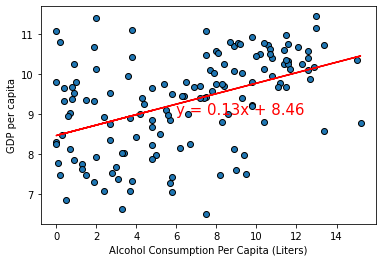

In [74]:
#Plot linear regression between the GDP per capita and Alcohol Consumption
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['GDP per capita']
plot_linear_regression(x_values,y_values,'GDP per capita',(6,9))

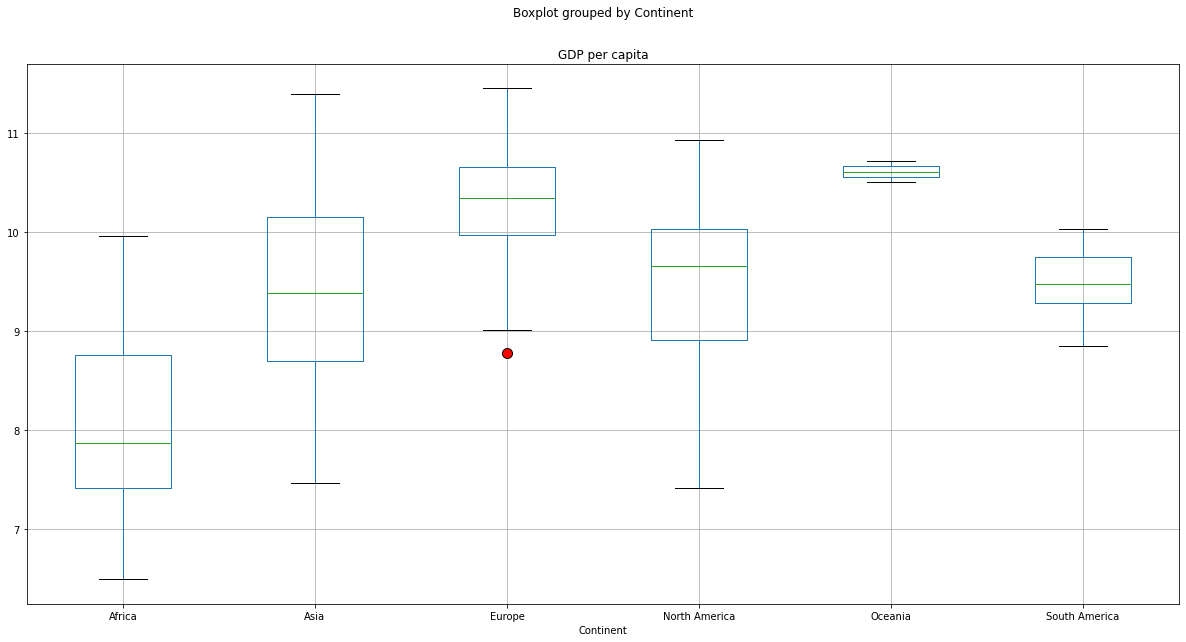

In [75]:
#Boxplot of GDP by Continent
gdp_and_life_expectancy_df.boxplot("GDP per capita", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

In [76]:
#Average mental health disorders by Continent
mental_health_by_continent_mean=gdp_and_life_expectancy_df.groupby("Continent")[["Mental Health Disorders (%)"]].mean()
mental_health_by_continent_mean

,Mental Health Disorders (%)
Continent,
Africa,12.644170
Asia,13.062704
Europe,13.324556
North America,12.461781
Oceania,18.286749
South America,13.385746


The r-value is: 0.007723890876234616


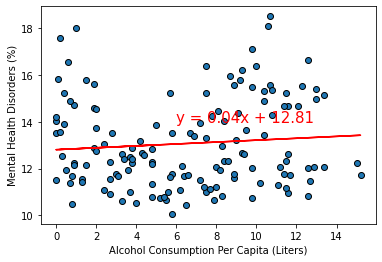

In [77]:
#Plot linear regression between the Mental Health Disorders and Alcohol Consumption
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['Mental Health Disorders (%)']
plot_linear_regression(x_values,y_values,'Mental Health Disorders (%)',(6,14))

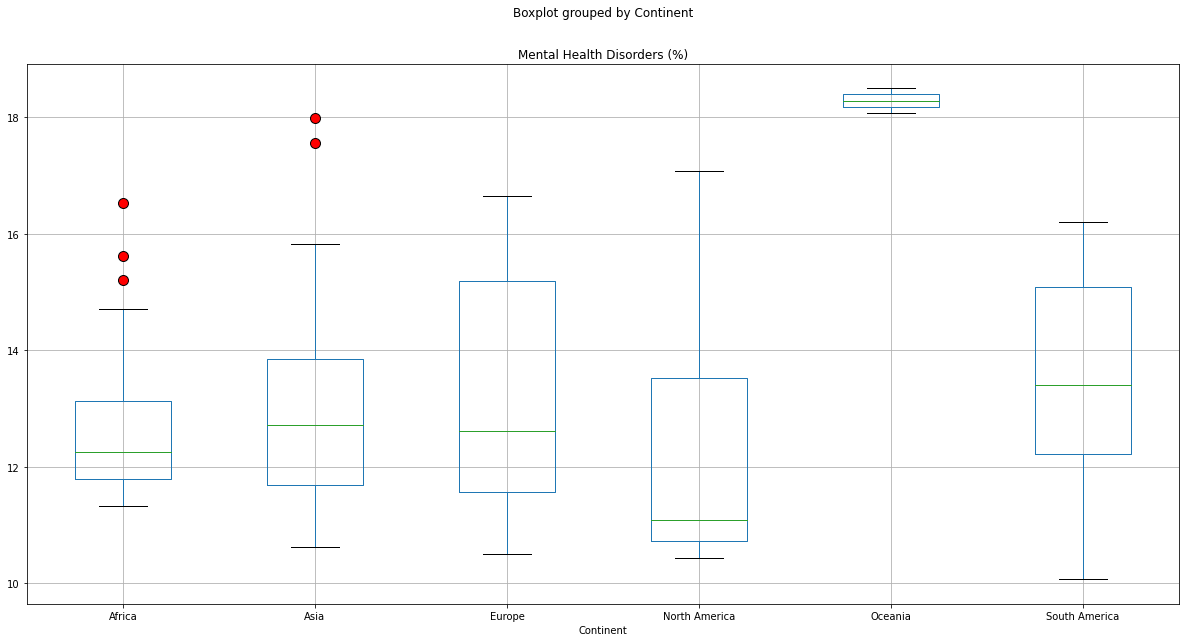

In [78]:
#Boxplot of mental health disorders by Continent
gdp_and_life_expectancy_df.boxplot("Mental Health Disorders (%)", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

## Looking at correlations between Wine Consumption and GDP, Life Expectancy, Happiness Score and Mental Health in Europe

In [79]:
#Separating Europe data into another dataframe
only_europe_data = gdp_and_life_expectancy_df.loc[(gdp_and_life_expectancy_df["Continent"]=="Europe")]
only_europe_data.sample(5)

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters)
81,Europe,ITA,Italy,7.5,predominantly Mediterranean; alpine in far nor...,Western Europe,6.3874,73.601685,10.481836,15.214273,4.97
73,Europe,HUN,Hungary,11.4,"temperate; cold, cloudy, humid winters; warm s...",Central and Eastern Europe,6.0004,67.609970,10.249244,11.758843,3.35
6,Europe,AZE,Azerbaijan,0.8,"dry, semiarid steppe",Commonwealth of Independent States,5.1648,65.508400,9.687727,10.495815,0.23
44,Europe,CYP,Cyprus,10.8,"temperate; Mediterranean with hot, dry summers...",Western Europe,6.1590,73.702225,10.405703,14.277582,2.48
146,Europe,SRB,Serbia,11.1,"in the north, continental climate (cold winter...",Central and Eastern Europe,5.7782,68.210205,9.680981,11.303094,4.16


In [81]:
#Statistical analysis on Europe only data
only_europe_data.describe()

,Alcohol Consumption Per Capita (Liters),Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,10.223256,6.231049,69.805096,10.243561,13.324556,2.828140
std,2.960360,0.904860,3.198465,0.591456,1.994888,1.787353
min,0.800000,4.560700,64.100456,8.776714,10.495815,0.130000
25%,8.650000,5.546050,67.055027,9.970097,11.573121,1.320000
50%,11.100000,6.159000,70.214905,10.340017,12.616894,2.870000
75%,12.200000,7.084750,72.403881,10.656453,15.182889,4.260000
max,15.200000,7.808700,74.402710,11.450681,16.640201,6.400000


# Overall Alcohol Consumption VS Wine Consumption Correlation with Happiness Score in Europe

In [ ]:
#Define a function for linear regressions 
def plot_wine_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, edgecolors='k')
    plt.plot(x_values,regress_values, "r-")
    plt.xlabel('Wine Consumption Per Capita (Liters)')
    plt.ylabel(title)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [ ]:
x_values=only_europe_data['Alcohol Consumption Per Capita (Liters)']
y_values=only_europe_data['Happiness Score']
plot_linear_regression(x_values,y_values,'Happiness Score',(6,7))
x_values=only_europe_data['Wine Consumption per capita (Liters)']
y_values=only_europe_data['Happiness Score']
plot_wine_linear_regression(x_values,y_values,'Happiness Score',(3,7))

# Overall Alcohol Consumption VS Wine Consumption Correlation with Life Expectancy in Europe

In [ ]:
x_values=only_europe_data['Alcohol Consumption Per Capita (Liters)']
y_values=only_europe_data['Life Expectancy']
plot_linear_regression(x_values,y_values,'Life Expectancy',(6,70))
x_values=only_europe_data['Wine Consumption per capita (Liters)']
y_values=only_europe_data['Life Expectancy']
plot_wine_linear_regression(x_values,y_values,'Life Expectancy',(3,68))

# Overall Alcohol Consumption VS Wine Consumption Correlation with GDP in Europe

In [ ]:
x_values=only_europe_data['Alcohol Consumption Per Capita (Liters)']
y_values=only_europe_data['GDP per capita']
plot_linear_regression(x_values,y_values,'GDP per capita',(6,11))
x_values=only_europe_data['Wine Consumption per capita (Liters)']
y_values=only_europe_data['GDP per capita']
plot_wine_linear_regression(x_values,y_values,'GDP per capita',(3,10))

# Overall Alcohol Consumption VS Wine Consumption Correlation with Mental Health in Europe

In [ ]:
x_values=only_europe_data['Alcohol Consumption Per Capita (Liters)']
y_values=only_europe_data['Mental Health Disorders (%)']
plot_linear_regression(x_values,y_values,'Mental Health Disorders (%)',(6,14))
x_values=only_europe_data['Wine Consumption per capita (Liters)']
y_values=only_europe_data['Mental Health Disorders (%)']
plot_wine_linear_regression(x_values,y_values,'Mental Health Disorders (%)',(3,14))

# Potential Causation between high GDP and high Alcohol Consumption

In [ ]:
bins = [0, 7, 8, 9, 10, 11, 12]
group_labels = ["GDP up to 7", "GDP up to 8", "GDP up to 9", "GDP up to 10", "GDP up to 11", "GDP up to 12"]
pd.cut(gdp_and_life_expectancy_df["GDP per capita"], bins, labels=group_labels).head()

In [ ]:
gdp_and_life_expectancy_df["GDP Group"] = pd.cut(gdp_and_life_expectancy_df["GDP per capita"], bins, labels=group_labels)
gdp_and_life_expectancy_df.sample(5)

In [ ]:
gdp_and_life_expectancy_df_gdp_groups=gdp_and_life_expectancy_df["GDP Group"].value_counts()
gdp_and_life_expectancy_df_gdp_groups

In [ ]:
gdp_and_life_expectancy_df_gdp_groups.plot(kind='bar', figsize=(12,3), title ='Number of Measurements per GDP Group')

In [ ]:
gdp_and_life_expectancy_df.boxplot("Alcohol Consumption Per Capita (Liters)", by="GDP Group", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

In [ ]:
gdp_and_life_expectancy_df.boxplot("Wine Consumption per capita (Liters)", by="GDP Group", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

In [ ]:
only_europe_gdp=gdp_and_life_expectancy_df.loc[(gdp_and_life_expectancy_df["Continent"]=="Europe")]
only_europe_gdp.sample(5)

In [ ]:
only_europe_gdp.boxplot("Alcohol Consumption Per Capita (Liters)", by="GDP Group", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

In [ ]:
only_europe_gdp.boxplot("Wine Consumption per capita (Liters)", by="GDP Group", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

In [ ]:
gdp_and_life_expectancy_df.to_csv("gdp_and_life_expectancy_df.csv")